Fraud Card Transaction 

card_transdata.csv dataset has 1,000,000 rows and 8 columns:
https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data


In [12]:
#packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [9]:
df = pd.read_csv("card_transdata.csv")

binaryCol = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
df[binaryCol] = df[binaryCol].astype('int8')
df.drop_duplicates(inplace=True)

train_df, test_df = train_test_split(df, 
                                     train_size=0.8, 
                                     random_state=42, 
                                     stratify=df['fraud'])

y_train = train_df['fraud']
X_train = train_df.drop(['fraud'], axis=1)
y_test = test_df['fraud']
X_test = test_df.drop(['fraud'], axis=1)

contCol = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
binaryCol = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

s = StandardScaler()
X_train_scaled_cont = s.fit_transform(X_train[contCol])
X_test_scaled_cont = s.transform(X_test[contCol])

X_train_scaled = pd.DataFrame(X_train_scaled_cont, columns=contCol, index=X_train.index)
X_train_scaled[binaryCol] = X_train[binaryCol]
X_train_scaled = X_train_scaled[X_train.columns]

X_test_scaled = pd.DataFrame(X_test_scaled_cont, columns=contCol, index=X_test.index)
X_test_scaled[binaryCol] = X_test[binaryCol]
X_test_scaled = X_test_scaled[X_test.columns]

#model training
lr = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr.fit(X_train_scaled, y_train)

svc = SVC(kernel='linear', random_state=42, class_weight='balanced', max_iter=2000)
svc.fit(X_train_scaled, y_train)

yLr = lr.predict(X_test_scaled)
print("\nLogistic Regression:")
print(classification_report(y_test, yLr, target_names=['Not Fraud (0)', 'Fraud (1)']))

ySvc = svc.predict(X_test_scaled)
print("\nSVM (SVC:")
print(classification_report(y_test, ySvc, target_names=['Not Fraud (0)', 'Fraud (1)']))

C:\Users\Luca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Logistic Regression:
               precision    recall  f1-score   support

Not Fraud (0)       0.99      0.93      0.96    182519
    Fraud (1)       0.58      0.95      0.72     17481

     accuracy                           0.93    200000
    macro avg       0.79      0.94      0.84    200000
 weighted avg       0.96      0.93      0.94    200000


SVM (SVC:
               precision    recall  f1-score   support

Not Fraud (0)       0.99      0.10      0.19    182519
    Fraud (1)       0.10      0.99      0.17     17481

     accuracy                           0.18    200000
    macro avg       0.54      0.55      0.18    200000
 weighted avg       0.91      0.18      0.19    200000




CONFUSION MATRIX VALUES

Logistic Regression Confusion Matrix:
True Negatives (TN):  170377
False Positives (FP): 12142
False Negatives (FN): 909
True Positives (TP):  16572

SVM Confusion Matrix:
True Negatives (TN):  18755
False Positives (FP): 163764
False Negatives (FN): 139
True Positives (TP):  17342


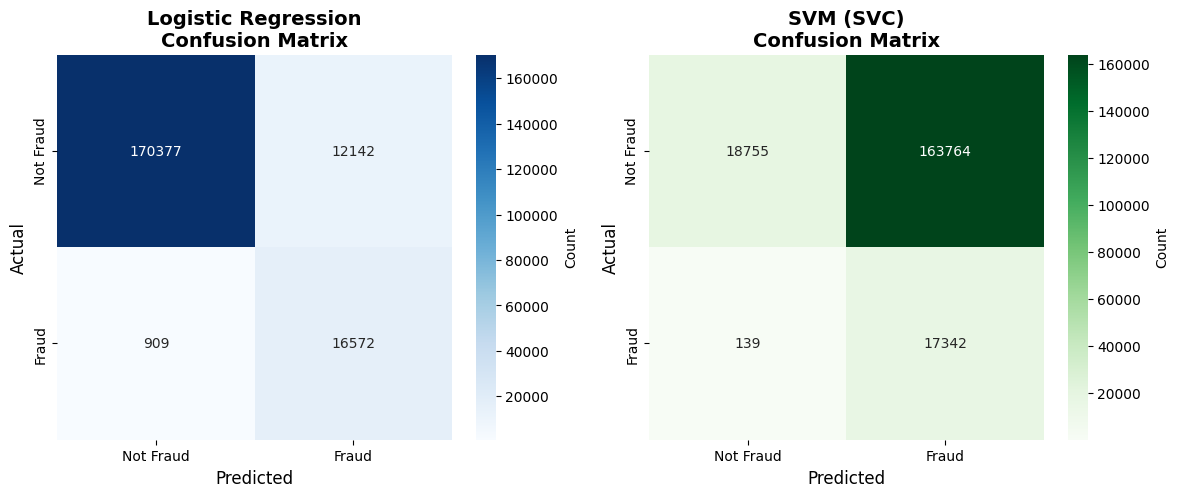

In [10]:
#confusion matrix
cm_lr = confusion_matrix(y_test, yLr)
cm_svc = confusion_matrix(y_test, ySvc)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Logistic Regression\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# SVM Confusion Matrix
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            cbar_kws={'label': 'Count'})
axes[1].set_title('SVM (SVC)\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)
print("\n" + "="*50)
print("CONFUSION MATRIX VALUES")
print("="*50)

print("\nLogistic Regression Confusion Matrix:")
print(f"True Negatives (TN):  {cm_lr[0, 0]}")
print(f"False Positives (FP): {cm_lr[0, 1]}")
print(f"False Negatives (FN): {cm_lr[1, 0]}")
print(f"True Positives (TP):  {cm_lr[1, 1]}")

print("\nSVM Confusion Matrix:")
print(f"True Negatives (TN):  {cm_svc[0, 0]}")
print(f"False Positives (FP): {cm_svc[0, 1]}")
print(f"False Negatives (FN): {cm_svc[1, 0]}")
print(f"True Positives (TP):  {cm_svc[1, 1]}")



Decision Tree:
               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00    182519
    Fraud (1)       1.00      1.00      1.00     17481

     accuracy                           1.00    200000
    macro avg       1.00      1.00      1.00    200000
 weighted avg       1.00      1.00      1.00    200000


Random Forest:
               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00    182519
    Fraud (1)       1.00      1.00      1.00     17481

     accuracy                           1.00    200000
    macro avg       1.00      1.00      1.00    200000
 weighted avg       1.00      1.00      1.00    200000


Decision Tree Confusion Matrix:
True Negatives (TN):  182518
False Positives (FP): 1
False Negatives (FN): 2
True Positives (TP):  17479

Random Forest Confusion Matrix:
True Negatives (TN):  182519
False Positives (FP): 0
False Negatives (FN): 5
True Positives (TP):  17476


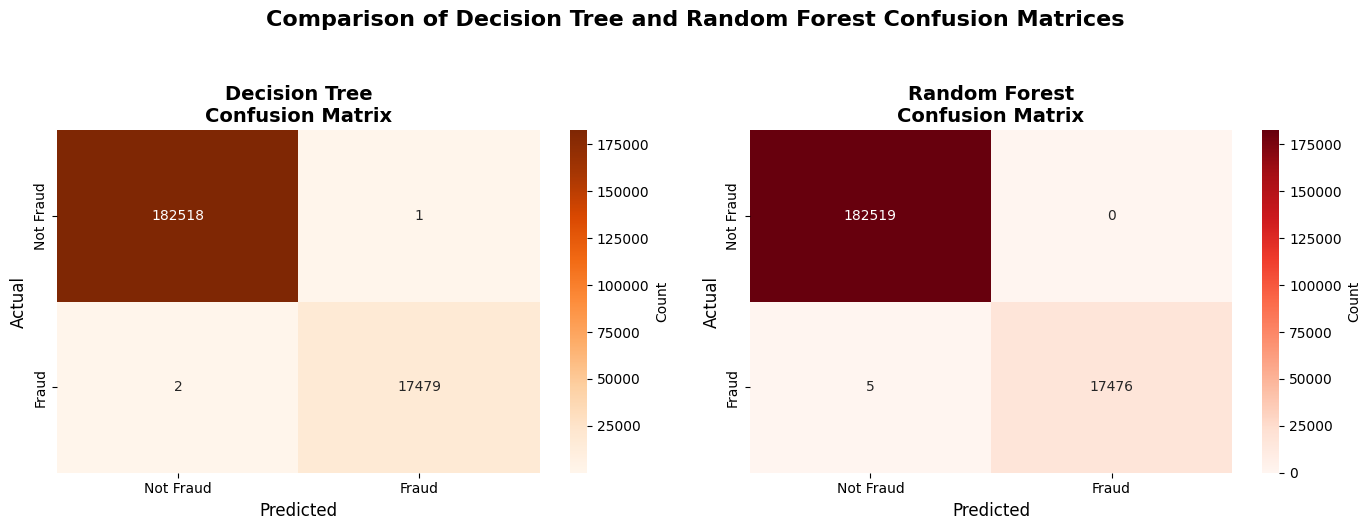


Area Under the Curve (AUC) Scores
Logistic Regression AUC: 0.9795
SVM (SVC) AUC: 0.7443
Decision Tree AUC: 0.9999
Random Forest AUC: 1.0000


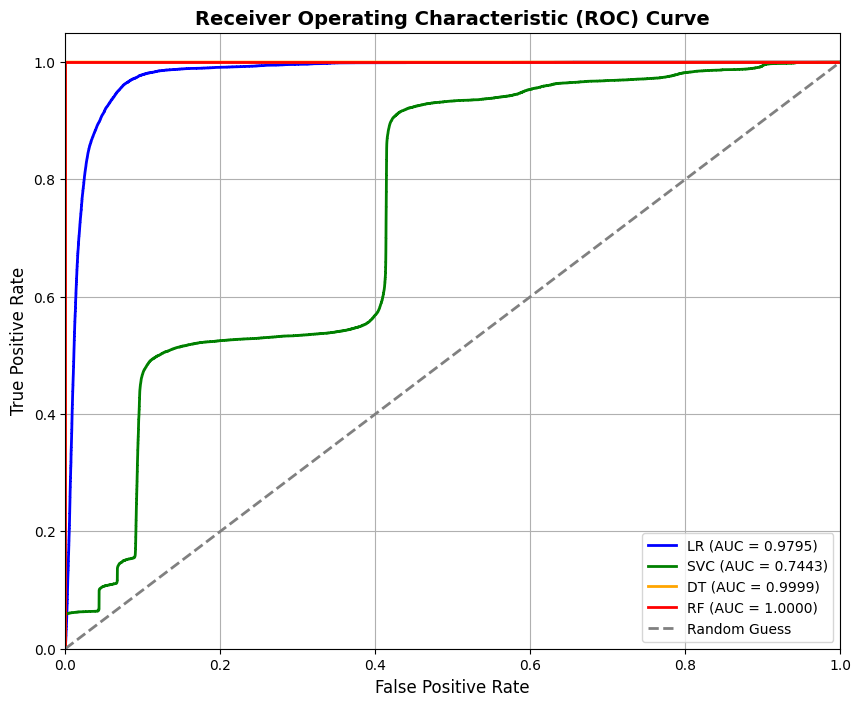

In [13]:
# Decision Tree and Random Forest
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf.fit(X_train_scaled, y_train)

yDt = dt.predict(X_test_scaled)
yRf = rf.predict(X_test_scaled)

# Classification Reports for dt and rf
print("\n" + "="*50)
print("Decision Tree:")
print(classification_report(y_test, yDt, target_names=['Not Fraud (0)', 'Fraud (1)']))

print("\nRandom Forest:")
print(classification_report(y_test, yRf, target_names=['Not Fraud (0)', 'Fraud (1)']))

# Confusion Matrices for dt and rf
cm_dt = confusion_matrix(y_test, yDt)
cm_rf = confusion_matrix(y_test, yRf)

print("\nDecision Tree Confusion Matrix:")
print(f"True Negatives (TN):  {cm_dt[0, 0]}")
print(f"False Positives (FP): {cm_dt[0, 1]}")
print(f"False Negatives (FN): {cm_dt[1, 0]}")
print(f"True Positives (TP):  {cm_dt[1, 1]}")

print("\nRandom Forest Confusion Matrix:")
print(f"True Negatives (TN):  {cm_rf[0, 0]}")
print(f"False Positives (FP): {cm_rf[0, 1]}")
print(f"False Negatives (FN): {cm_rf[1, 0]}")
print(f"True Positives (TP):  {cm_rf[1, 1]}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', ax=axes[0], 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            cbar_kws={'label': 'Count'})
axes[0].set_title('Decision Tree\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', ax=axes[1],
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            cbar_kws={'label': 'Count'})
axes[1].set_title('Random Forest\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)

plt.suptitle('Comparison of Decision Tree and Random Forest Confusion Matrices', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# ROC and AUC
yLr_prob = lr.predict_proba(X_test_scaled)[:, 1]
ySvc_prob = svc.decision_function(X_test_scaled)
yDt_prob = dt.predict_proba(X_test_scaled)[:, 1]
yRf_prob = rf.predict_proba(X_test_scaled)[:, 1]

auc_lr = roc_auc_score(y_test, yLr_prob)
auc_svc = roc_auc_score(y_test, ySvc_prob)
auc_dt = roc_auc_score(y_test, yDt_prob)
auc_rf = roc_auc_score(y_test, yRf_prob)

fpr_lr, tpr_lr, _ = roc_curve(y_test, yLr_prob)
fpr_svc, tpr_svc, _ = roc_curve(y_test, ySvc_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, yDt_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, yRf_prob)

print("\n" + "="*50)
print("Area Under the Curve (AUC) Scores")
print("="*50)
print(f"Logistic Regression AUC: {auc_lr:.4f}")
print(f"SVM (SVC) AUC: {auc_svc:.4f}")
print(f"Decision Tree AUC: {auc_dt:.4f}")
print(f"Random Forest AUC: {auc_rf:.4f}")

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'LR (AUC = {auc_lr:.4f})')
plt.plot(fpr_svc, tpr_svc, color='green', lw=2, label=f'SVC (AUC = {auc_svc:.4f})')
plt.plot(fpr_dt, tpr_dt, color='orange', lw=2, label=f'DT (AUC = {auc_dt:.4f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'RF (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.show()